In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
%matplotlib inline

In [2]:
#Importing Data
data=pd.read_csv('startup_funding.csv')

In [3]:
#Data Overview
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
data.info

<bound method DataFrame.info of        SNo         Date       StartupName   IndustryVertical  \
0        0   01/08/2017          TouchKin         Technology   
1        1   02/08/2017           Ethinos         Technology   
2        2   02/08/2017      Leverage Edu  Consumer Internet   
3        3   02/08/2017              Zepo  Consumer Internet   
4        4   02/08/2017      Click2Clinic  Consumer Internet   
5        5   01/07/2017     Billion Loans  Consumer Internet   
6        6   03/07/2017  Ecolibriumenergy         Technology   
7        7   04/07/2017             Droom          eCommerce   
8        8   05/07/2017         Jumbotail          eCommerce   
9        9   05/07/2017            Moglix          eCommerce   
10      10   05/07/2017        Timesaverz  Consumer Internet   
11      11   06/07/2017            Minjar         Technology   
12      12   06/07/2017       MyCity4kids  Consumer Internet   
13      13   07/07/2017          Clip App  Consumer Internet   
14      

In [5]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [6]:
data.shape

(2372, 10)

In [7]:
#Removing Useless Columns
data.drop(columns=['Remarks'],inplace=True)
data.drop(columns=['SNo'],inplace=True)

In [8]:
#Cleaning the data to make it efficient
null_values=pd.isnull(data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/data.shape[0])*100
missing_data=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_data

,Missing Data,Percentage
Columns,,
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000


# Analysis

In [9]:
data['AmountInUSD']=data['AmountInUSD'].apply(lambda x: float(str(x).replace(',','')))

In [10]:
data[data['AmountInUSD'].isnull()].shape

(847, 8)

In [11]:
#Top 10 Startups On Basis Of Funds Acquired
top_10_startups=pd.DataFrame(data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).head(10))
top_10_startups['AmountInUSD']=top_10_startups['AmountInUSD'].apply(lambda x: math.ceil(x))
top_10_startups

,AmountInUSD
StartupName,
Paytm,2140000000
Flipkart,1559700000
Ola,984500000
Flipkart.com,700000000
Snapdeal,700000000
Ola Cabs,515000000
Olacabs,400000000
Oyo Rooms,350000000
Quikr,230000000


In [12]:
#To get Minimum Funds acquired by startup
(data['AmountInUSD'].describe()['min'])

16000.0

In [13]:
# In Data
data[data['AmountInUSD']==16000]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


In [14]:
# City Having Maximum Startup
cities=data[data['CityLocation']!='Not Specified']
cities=cities['CityLocation'].value_counts().sort_values(ascending=False).head(10)
cities

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

In [15]:
# Industry having Maximum Startups
df=data[data['IndustryVertical']!='others']
df['IndustryVertical'].value_counts().sort_values(ascending=False).head(10)

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64

In [16]:
# Common Investment Types
data['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd funding        1
Debt Funding         1
PrivateEquity        1
Crowd Funding        1
Name: InvestmentType, dtype: int64

In [17]:
data['Date']=data['Date'].apply(lambda x: str(x).replace('.','/'))
data['Date']=data['Date'].apply(lambda x: str(x).replace('//','/'))
data['Date']=pd.to_datetime(data['Date'])

In [18]:
# To get most number of startup funded in certain time
date_year=data['Date'].dt

data['Month']=date_year.month
data['Year']=date_year.year

data['Quarter']=''
data['Year']=data['Year'].astype('object')

data.loc[(data['Month']>=1) & (data['Month']<=3),'Quarter']=str(1)
data.loc[(data['Month']>=4) & (data['Month']<=6),'Quarter']=str(2)
data.loc[(data['Month']>=7) & (data['Month']<=9),'Quarter']=str(3)
data.loc[(data['Month']>=10) & (data['Month']<=12),'Quarter']=str(4)

data['Quarter']=data['Year'].astype(str)+"-Q"+data['Quarter'].astype(str)

In [21]:
data.groupby('Quarter')['StartupName'].count().sort_values(ascending=False)

Quarter
2015-Q3    275
2016-Q2    265
2016-Q1    251
2016-Q3    239
2016-Q4    238
2015-Q4    237
2015-Q2    215
2015-Q1    209
2017-Q1    166
2017-Q2    151
2017-Q3     74
2017-Q4     52
Name: StartupName, dtype: int64

In [22]:
# To get top investors by number of startup funded

In [24]:
data['InvestorsName'].fillna(value='Undisclosed Investors',inplace=True)
data['InvestorsName']=data['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors')

In [25]:
def investors_cleaner(x):
    b=str(x).lower()
    if 'undisclosed' in b:
        return 'Undisclosed Investor'
    else:
        return x

In [26]:
data['InvestorsName']=data['InvestorsName'].apply(investors_cleaner)

In [27]:
def investors_counter(x):
    l=x.split(',')
    return len(l)

In [28]:
investors_companies_funded={}
unique_name=data['InvestorsName'].unique()
name=np.array(data['InvestorsName'].values)
for i in range(len(unique_name)):
    for j in range(len(name)):
        if(re.search(unique_name[i],name[j])):
            investors_companies_funded[unique_name[i]]=investors_companies_funded.get(unique_name[i],0)+1


In [29]:
lst_investors = pd.DataFrame({'Name':list(investors_companies_funded.keys()),'Number of Startups Funded':list(investors_companies_funded.values())}).sort_values('Number of Startups Funded',ascending=False)

In [30]:
lst_investors[lst_investors['Name']!='Undisclosed Investor'].head(10)

,Name,Number of Startups Funded
85,Sequoia Capital,74
112,Accel Partners,63
401,Kalaari Capital,51
50,Blume Ventures,47
497,SAIF Partners,45
21,Indian Angel Network,42
884,Tiger Global,41
1191,IDG Ventures,40
506,Ratan Tata,30
1628,Mohandas Pai,29


# Questions And Answer By Graph

In [31]:
# Q1. Which Industry Has Most Number Of Startups ?

In [32]:
mask=df.groupby('IndustryVertical')['StartupName'].count().sort_values(ascending=False).head(10).index.tolist()
top_10_industries=data[data['IndustryVertical'].isin(mask)]

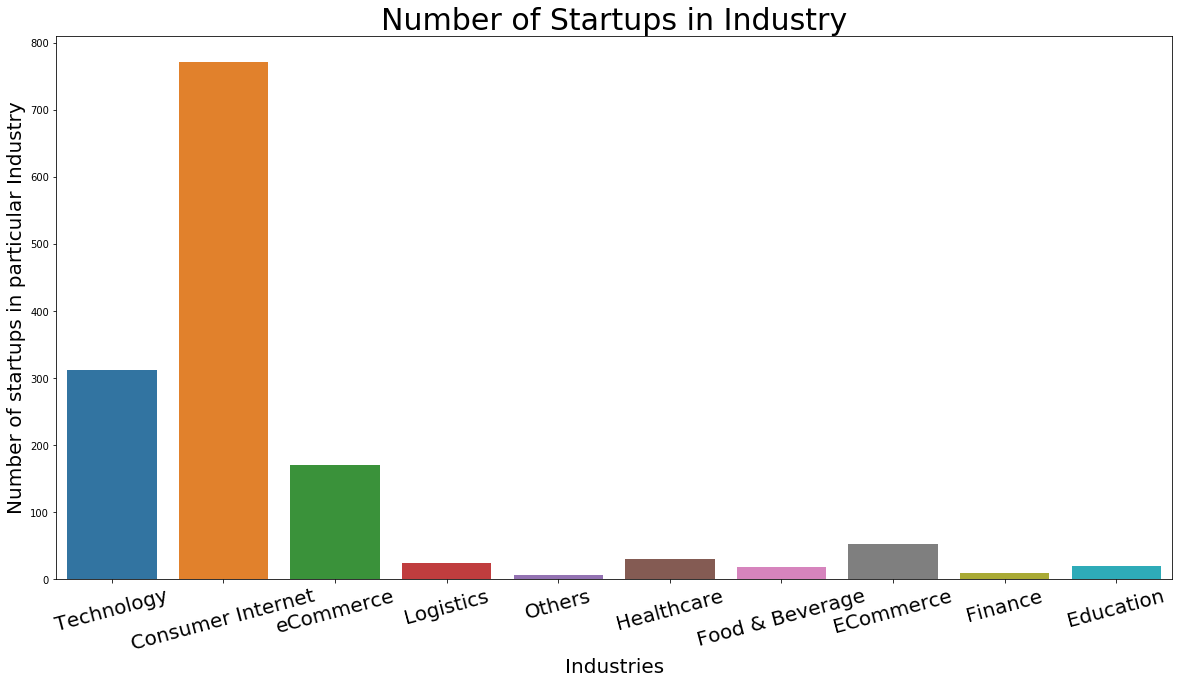

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='IndustryVertical',data=top_10_industries)
plt.xlabel('Industries',fontsize=20)
plt.xticks(rotation=15,fontsize=20)
plt.ylabel('Number of startups in particular Industry',fontsize=20)
plt.title('Number of Startups in Industry',fontsize=30)
plt.show()

In [34]:
# Ans:- As we can see Technology,Consumer Internet And eCommerce Industries have most number of startups

In [35]:
# Q2. Which City Has Maximum Startups ?

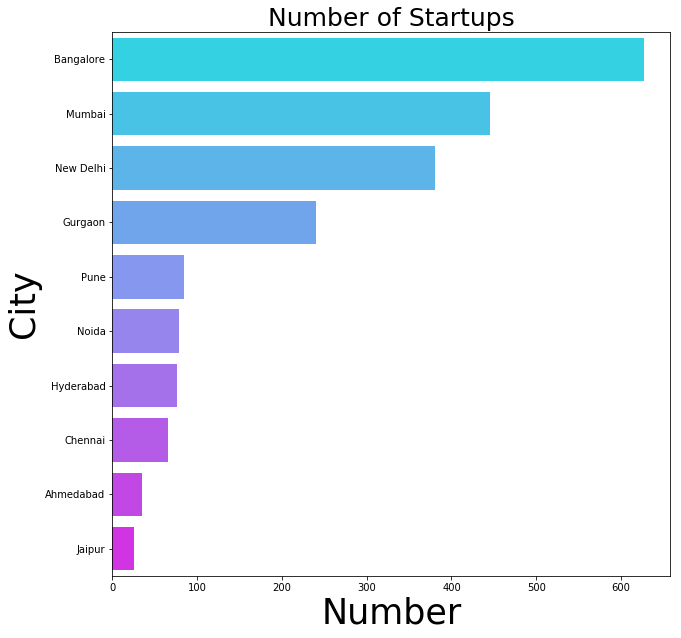

In [36]:
plt.figure(figsize=(10,10))
plt.title('Number of Startups',fontsize=25)
plt.xlabel('Number',fontsize=35)
plt.ylabel('City',fontsize=35)
sns.barplot(cities.values,cities.index,palette='cool')
plt.show()

In [37]:
# Ans:- As we can see Banglore, Mumbai And Delhi Have Most Number of startups.

In [38]:
#Q3 What Are the most Common Investment Types ?

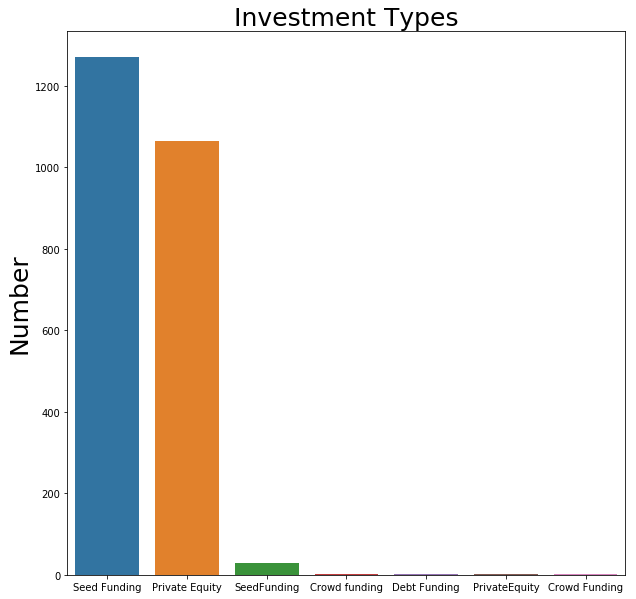

In [39]:
graph_data=data['InvestmentType'].value_counts()
plt.figure(figsize=(10,10))
plt.ylabel('Number',fontsize=25)
plt.title('Investment Types',fontsize=25)
sns.barplot(graph_data.index,graph_data.values)
plt.savefig('CommonInvestmentTypes.png',dpi=300)

In [40]:
# Ans:- Seed Funding And Private Equity Are Most Common Investment Type.

In [41]:
# Q4. Which Part Of Year Most Number Of Startups Were Funded ?

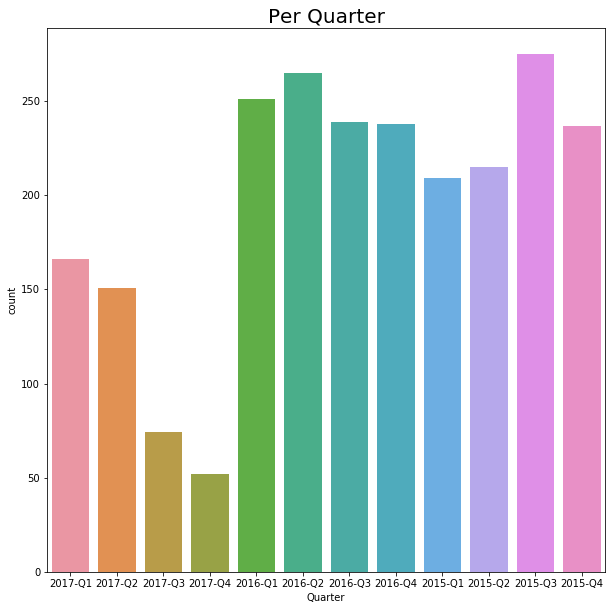

In [43]:
plt.figure(figsize=(10,10))
plt.title('Per Quarter',fontsize=20)
sns.countplot(x='Quarter',data=data)
plt.savefig('QuarterlyTrend.png',dpi=300)

In [52]:
# Ans:- As we can see Q3 of 2015 and Q2 of 2016 most number of startups were funded 

In [48]:
#Q5. Who Are The Top Investors ?

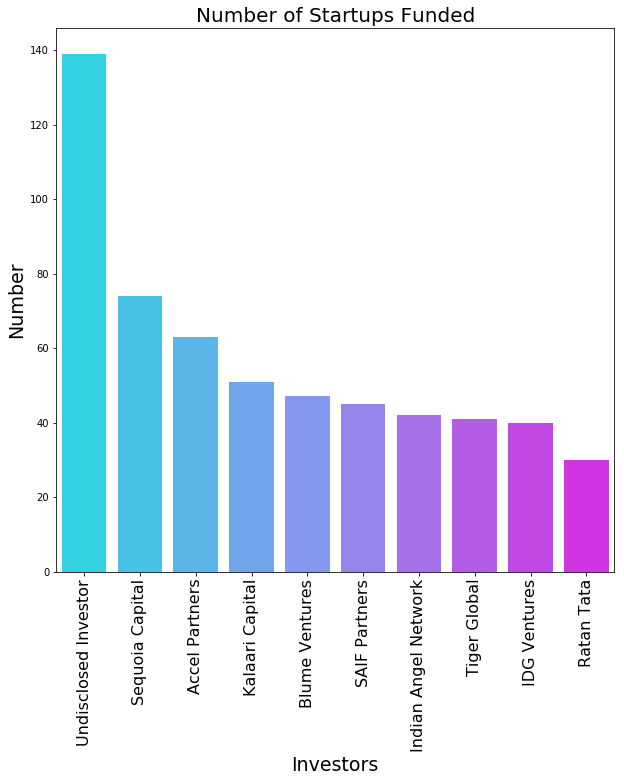

In [49]:
temp=investors_companies_funded
index=list(temp.keys())
values=list(temp.values())
graph_data=pd.Series(values,index=index).sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.xlabel('Investors',fontsize=19)
plt.ylabel('Number',fontsize=19)
plt.title('Number of Startups Funded',fontsize=20)
plt.xticks(fontsize=16,rotation='vertical')
sns.barplot(graph_data.index,graph_data.values,palette='cool')
plt.show()

In [50]:
#Ans:- As we can see Sequoia Capital, Accel Partners and Kalaari Capital are top investors.